### Zadanie 3
Wykonaj następujące polecenia za pomocą biblioteki seaborn oraz pandas.

| Kolumna        | Opis                                                                                                                                                         |
|----------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id             | Unikalny identyfikator.                                                                                                                                      |
| year           | Rok lotu. Zbiór zawiera loty z 2013 roku.                                                                                                                    |
| month          | Miesiąc roku kiedy odbył się lot, przedstawiony jako liczba od 1 (Styczeń) do 12 (Grudzień).                                                                 |
| day            | Dzień miesiąca kiedy odbył się lot, przedstawiony jako liczba od 1 do 31.                                                                                    |
| dep_time       | Rzeczywisty czas odlotu, przedstawiony w formacie 24h (hhmm).                                                                                                |
| sched_dep_time | Zaplanowany czas odlotu, przedstawiony w formacie 24h (hhmm).                                                                                                |
| dep_delay      | Opóźnienie odlotu, obliczone jako różnica rzeczywistego, a zaplanowanego czasu odlotu. Dodatnia wartość oznacza opóźnienie, ujemna wcześniejszy odlot.       |
| arr_time       | Rzeczywisty czas przylotu, przedstawiony w formacie 24h (hhmm).                                                                                              |
| sched_arr_time | Zaplanowany czas przylotu, przedstawiony w formacie 24h (hhmm).                                                                                              |
| arr_delay      | Opóźnienie przylotu, obliczone jako różnica rzeczywistego, a zaplanowanego czasu przylotu. Dodatnia wartość oznacza opóźnienie, ujemna wcześniejszy przylot. |
| carrier        | Dwuliterowy kod przewoźnika odpowiedzialnego za lot.                                                                                                         |
| flight         | Numer lotu.                                                                                                                                                  |
| tailnum        | Unikalny identyfikator samolotu którym wykonano lot.                                                                                                         |
| origin         | Trzy literowy kod lotniska odlotu.                                                                                                                           |
| dest           | Trzy literowy kod lotniska przylotu.                                                                                                                         |
| air_time       | Długość lotu w minutach.                                                                                                                                     |
| distance       | Całkitowy dystans (w milach) pomiędzy portem odlotu, a portem przylotu.                                                                                      |
| hour           | Zaplanowana godzina odlotu, w lokalnej strefie czasowej.                                                                                                     |
| minute         | Zaplanowana minuta odlotu, w lokalnej strefie czasowej.                                                                                                      |
| time_hour      | Zaplanowana data lotu, przedstawiona w lokalnej strefie czasowej w formacie "yyyy-mm-dd hh:mm:ss".                                                           |
| name           | Pełna nazwa przewoźnika odpowiedzialnego za lot.                                                                                                             |

Import bibliotek NumPy, pandas, seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

Import pliku flights.csv oraz wyświetl kilka pierwszych wierszy

In [4]:
df_flights = pd.read_csv('flights.csv')
df_flights.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [4]:
######################################################################################

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


Odfiltruj wiersze które nie mają wartości

In [5]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [11]:
df_flights = df_flights.dropna()

In [12]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327346 entries, 0 to 336769
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              327346 non-null  int64  
 1   year            327346 non-null  int64  
 2   month           327346 non-null  int64  
 3   day             327346 non-null  int64  
 4   dep_time        327346 non-null  float64
 5   sched_dep_time  327346 non-null  int64  
 6   dep_delay       327346 non-null  float64
 7   arr_time        327346 non-null  float64
 8   sched_arr_time  327346 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         327346 non-null  object 
 11  flight          327346 non-null  int64  
 12  tailnum         327346 non-null  object 
 13  origin          327346 non-null  object 
 14  dest            327346 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        327346 non-null  int64  
 17  hour           

Wykres liczności kategorii (count) - rok

C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

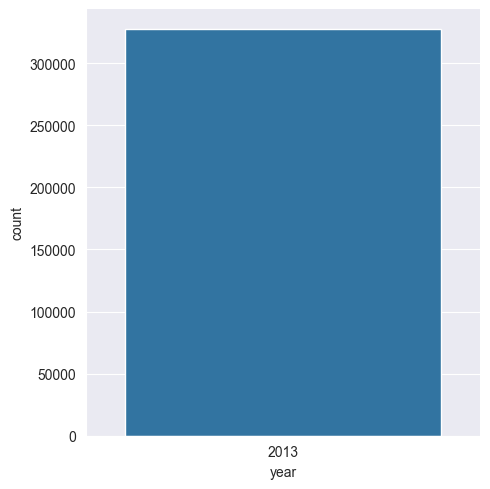

In [14]:
_ = sns.catplot(df_flights, x='year', kind='count')

C:\Users\Sebastian\PycharmProjects\data_science\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


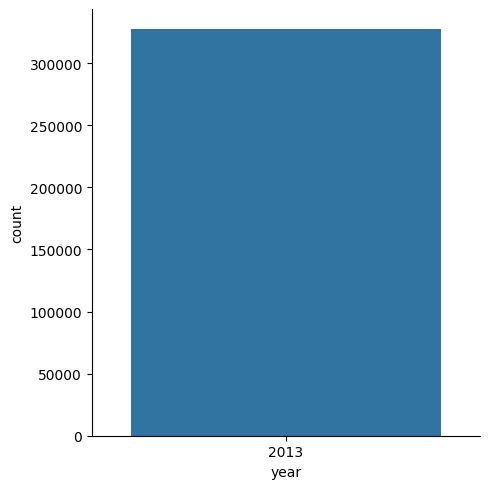

In [7]:
######################################################################################

Wykres liczności kategorii (count) - kod przewoźnika (carrier)

C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

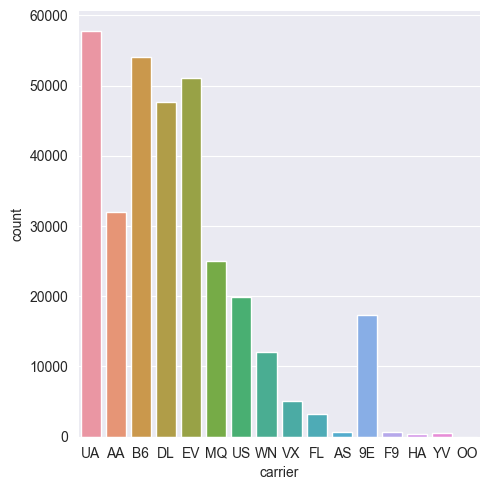

In [15]:
_ = sns.catplot(df_flights, x='carrier', kind='count')

C:\Users\Sebastian\PycharmProjects\data_science\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


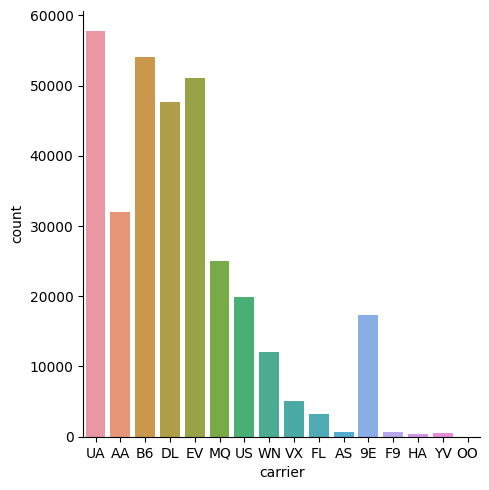

In [9]:
######################################################################################

Wykres liczności kategorii (count) - lotnisko odlotu

C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

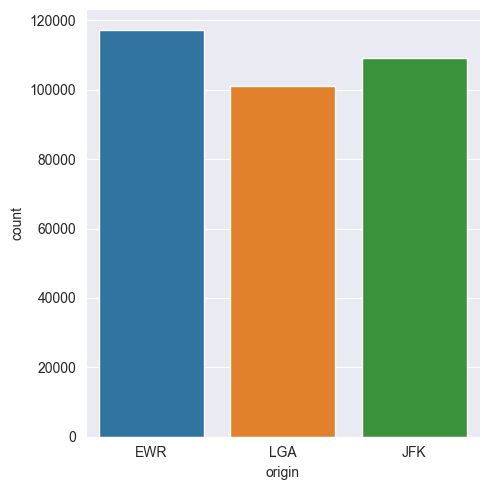

In [16]:
_ = sns.catplot(df_flights, x='origin', kind='count')

C:\Users\Sebastian\PycharmProjects\data_science\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


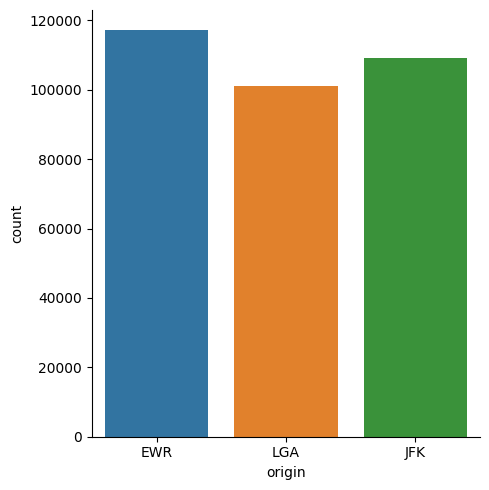

In [10]:
######################################################################################

Wykres liczności kategorii (count) - lotnisko przylotu

C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

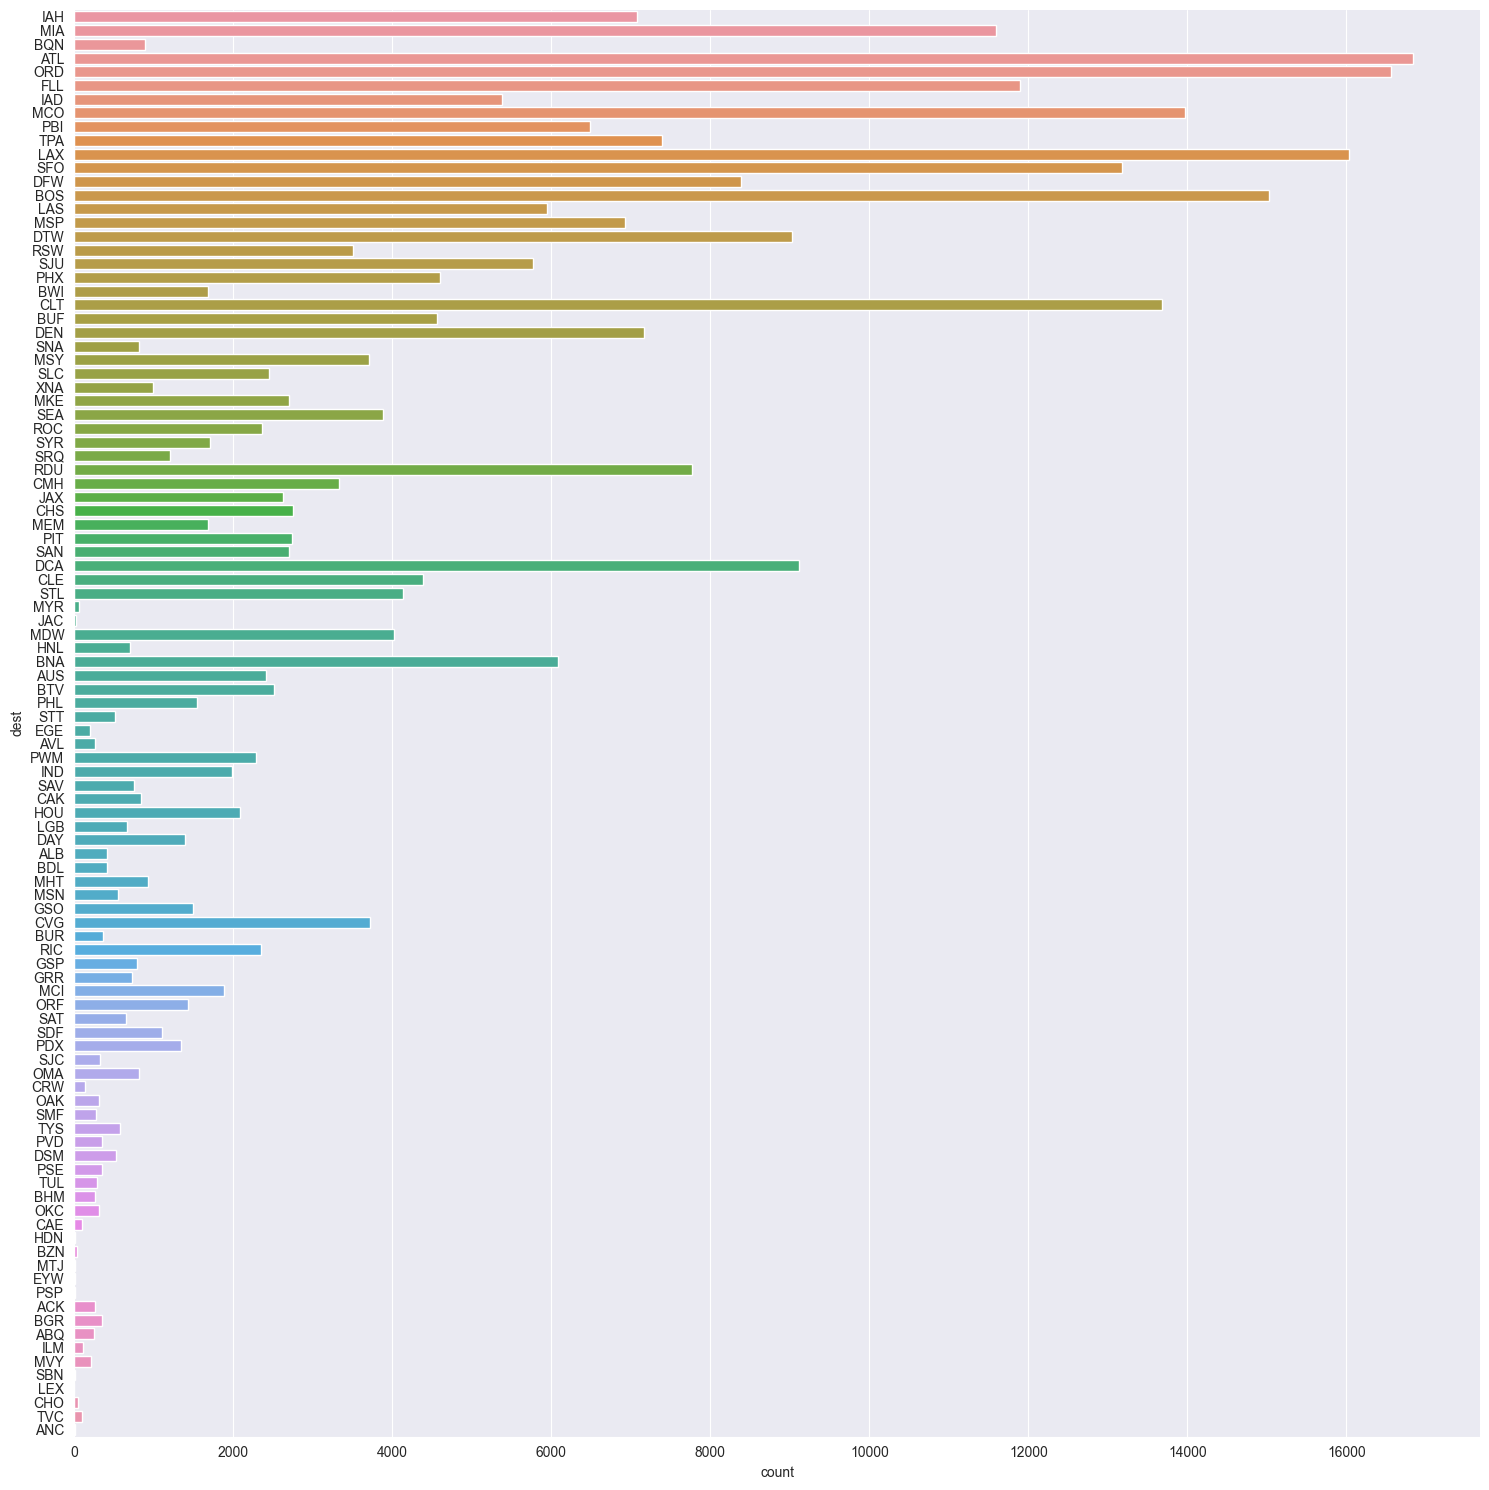

In [21]:
_ = sns.catplot(df_flights, y='dest', kind='count', height=15)

C:\Users\Sebastian\PycharmProjects\data_science\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


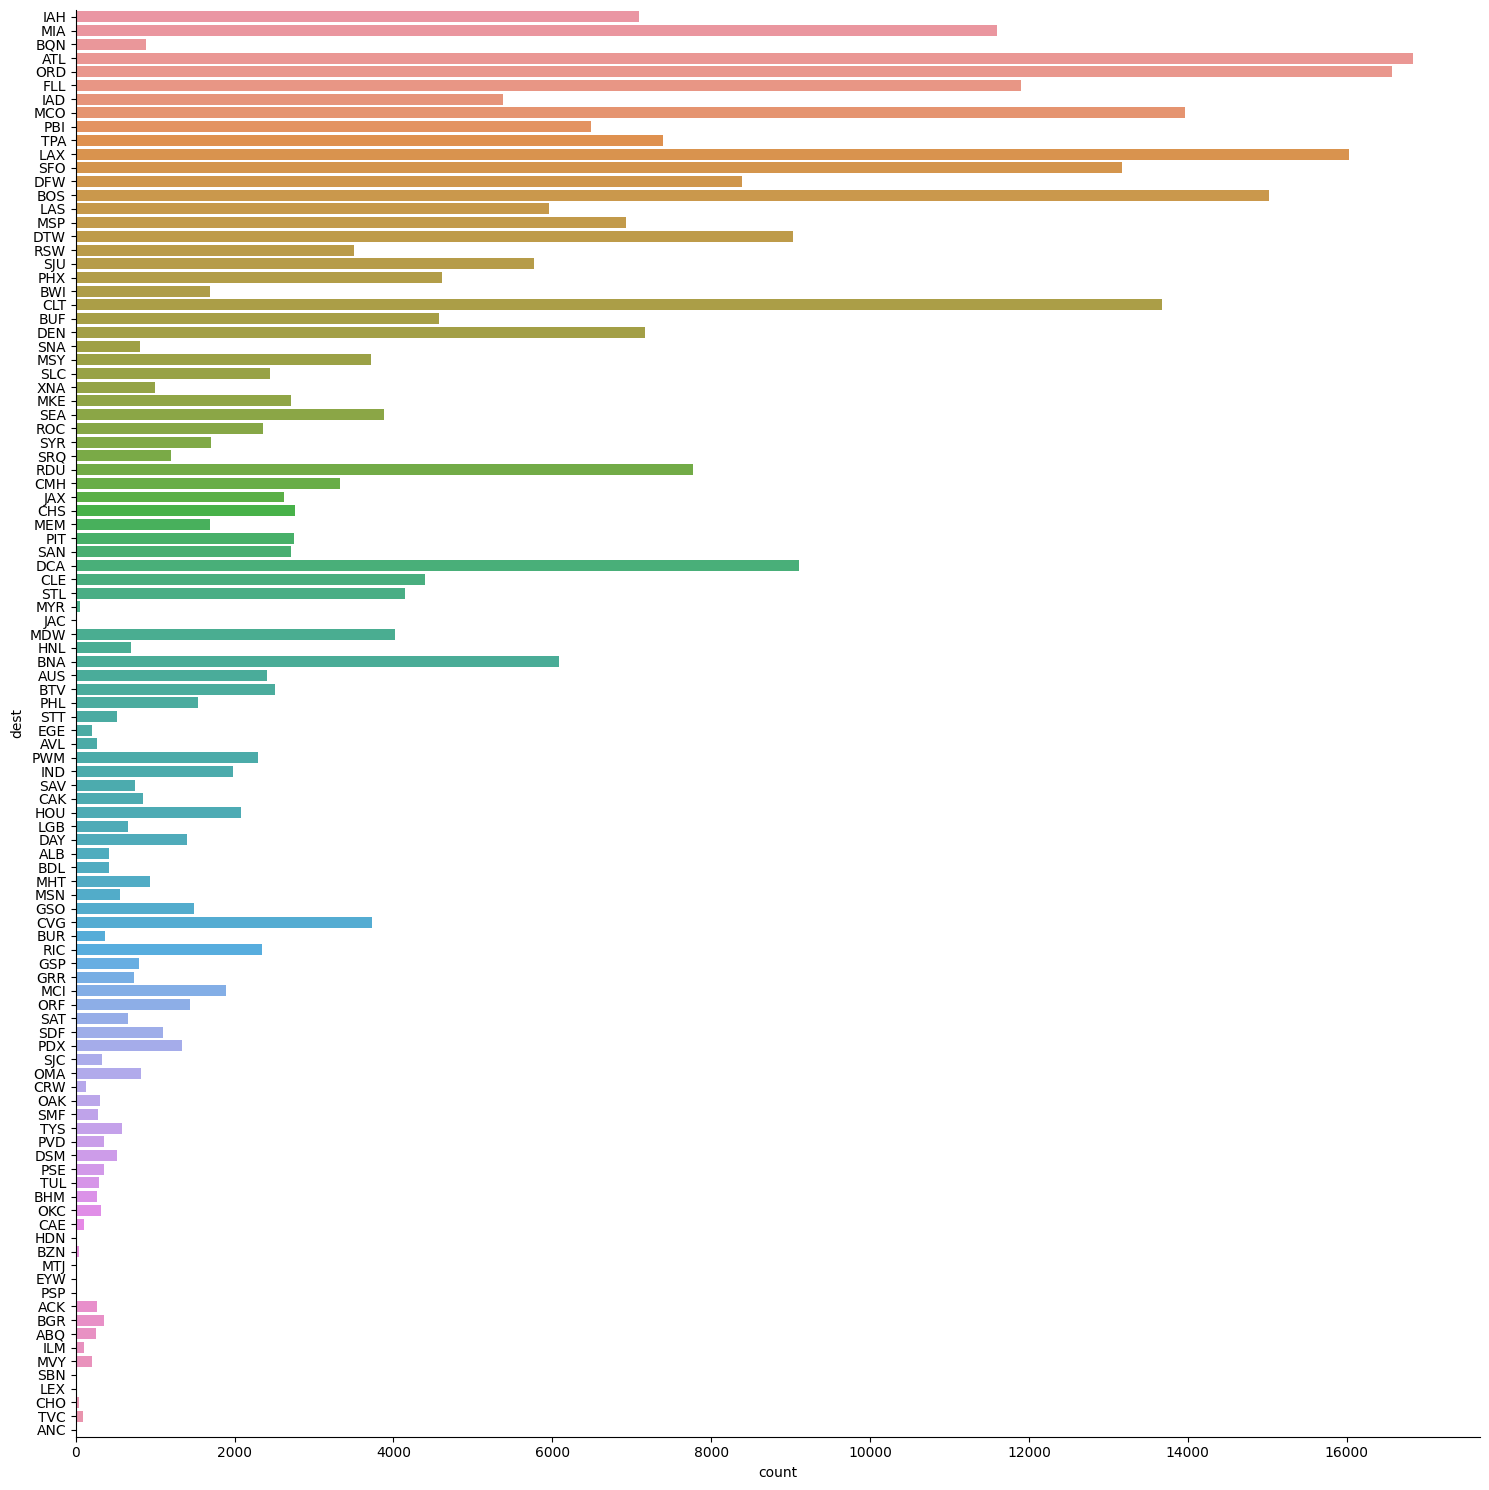

In [23]:
######################################################################################

Wykres liczności kategorii (count) - nazwa lini lotniczej przewoźnika

C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

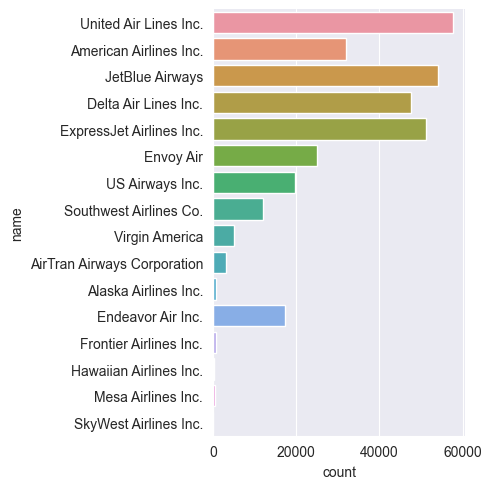

In [23]:
_ = sns.catplot(df_flights, y='name', kind='count')

C:\Users\Sebastian\PycharmProjects\data_science\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


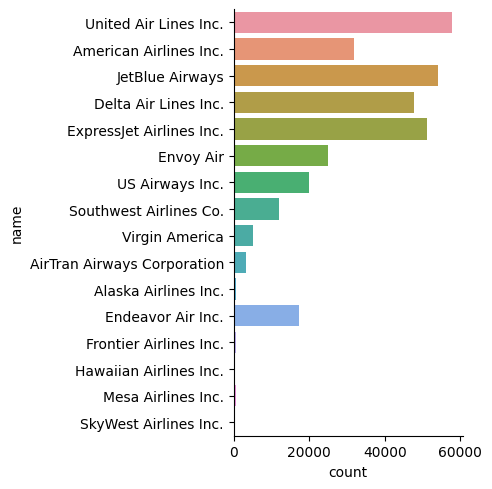

In [20]:
######################################################################################

Histogram - miesiąc - bins=12

C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


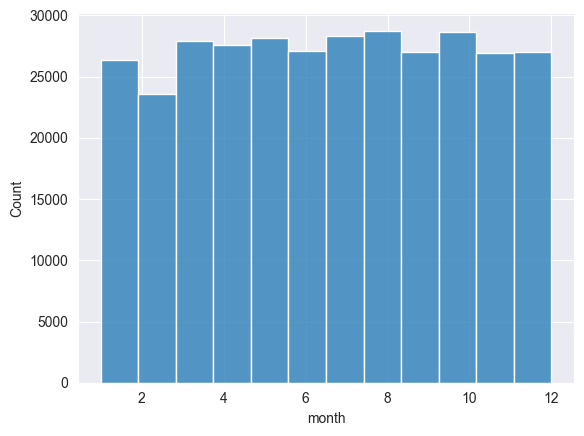

In [25]:
_ = sns.histplot(df_flights, x='month', bins=12)

C:\Users\Sebastian\PycharmProjects\data_science\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


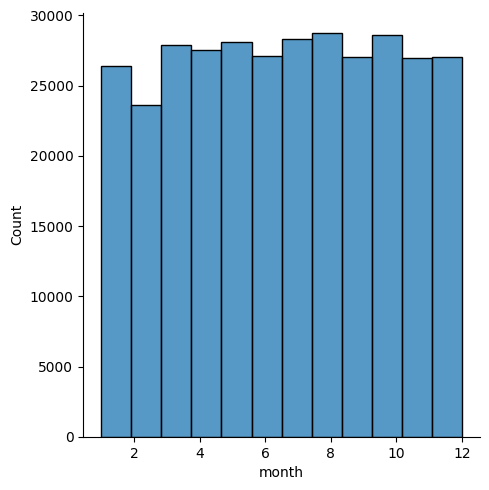

In [32]:
######################################################################################

Histogram - dzień - bins=31

C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


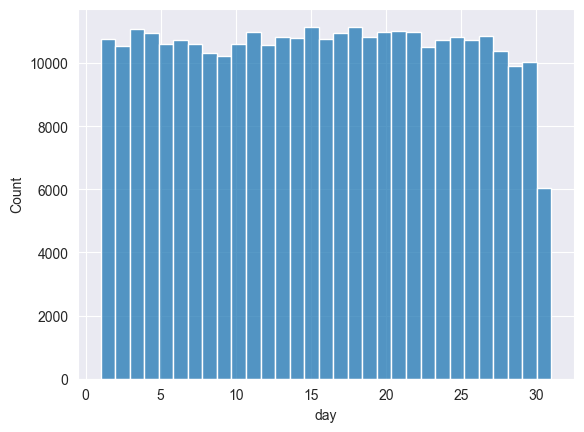

In [26]:
_ = sns.histplot(df_flights, x='day', bins=31)

C:\Users\Sebastian\PycharmProjects\data_science\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


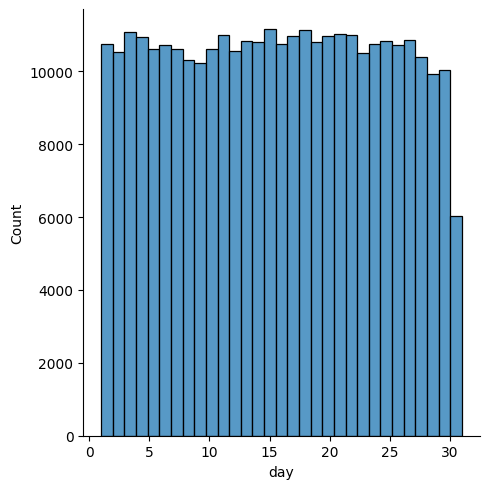

In [33]:
######################################################################################

Histogram - czas odlotu (dep_time) - bins=24

C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


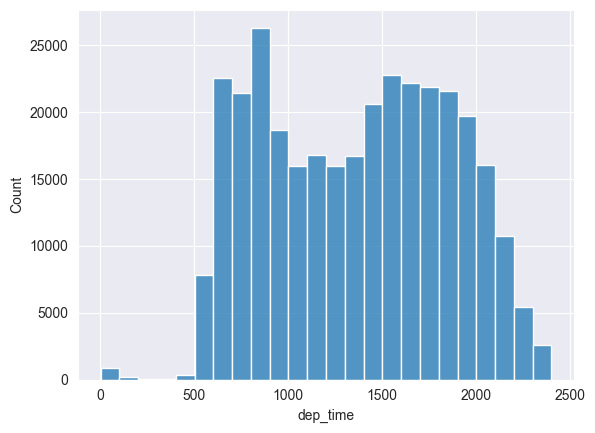

In [27]:
_ = sns.histplot(df_flights, x='dep_time', bins=24)

C:\Users\Sebastian\PycharmProjects\data_science\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


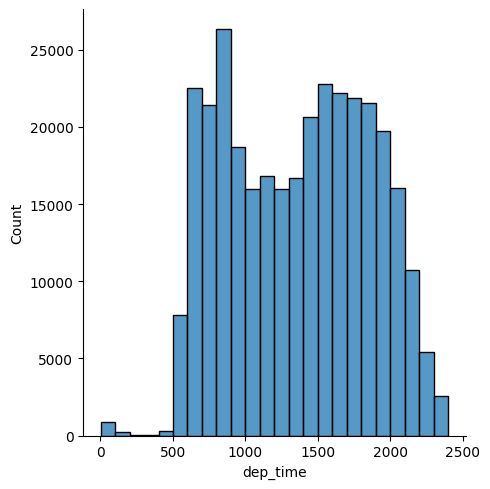

In [34]:
######################################################################################

Histogram - spóźnienie odlotu - bins=30

C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


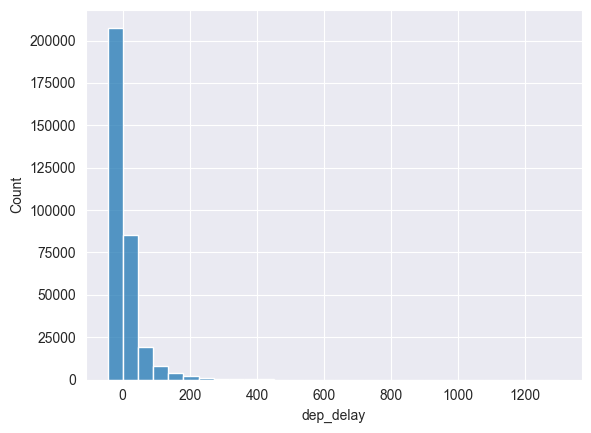

In [31]:
_ = sns.histplot(df_flights, x='dep_delay', bins=30)

C:\Users\Sebastian\PycharmProjects\data_science\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


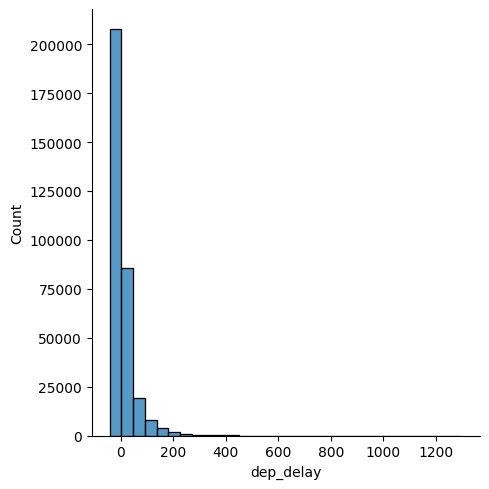

In [31]:
######################################################################################

Histogram - czas przylotu (arr_time)

C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


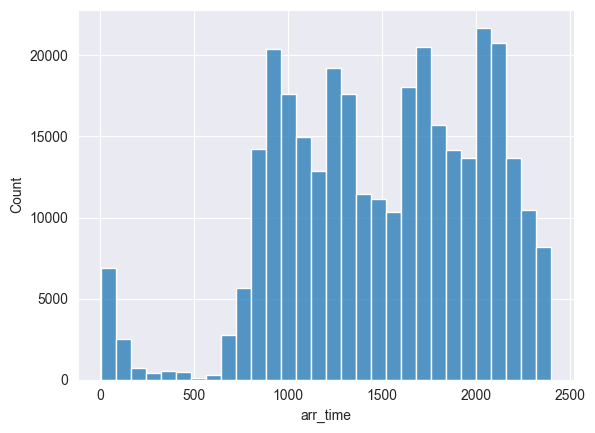

In [29]:
_ = sns.histplot(df_flights, x='arr_time', bins=30)

C:\Users\Sebastian\PycharmProjects\data_science\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


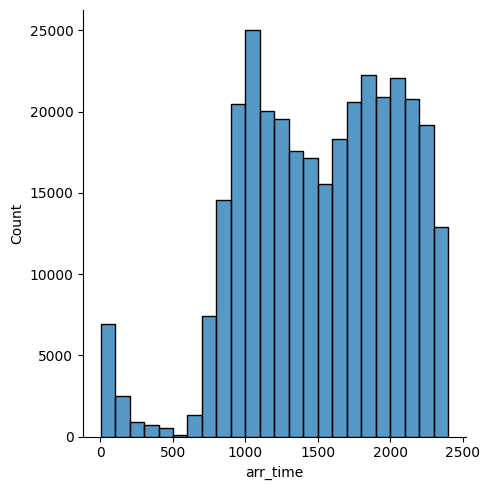

In [35]:
######################################################################################

Histogram - spóźnienie przylotu

C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


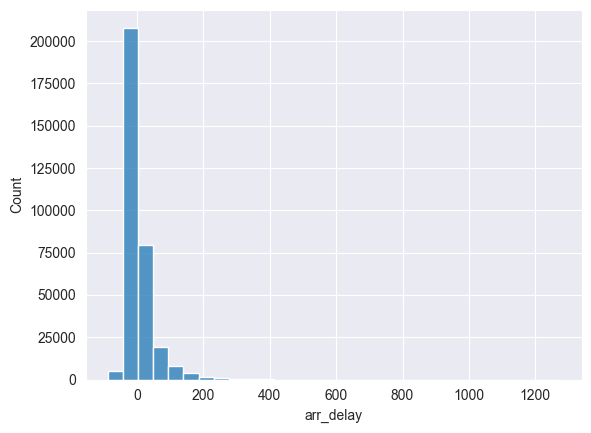

In [30]:
_ = sns.histplot(df_flights, x='arr_delay', bins=30)

C:\Users\Sebastian\PycharmProjects\data_science\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


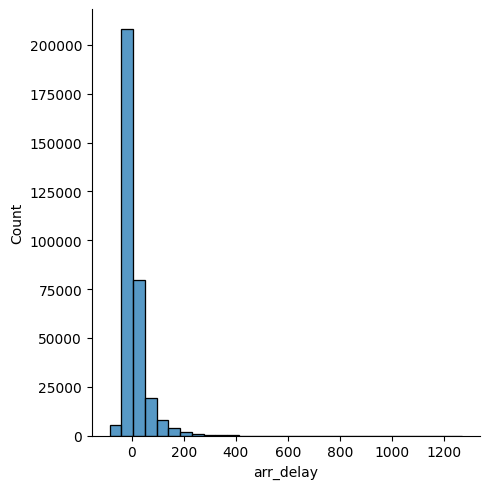

In [36]:
######################################################################################

Histogram - czas w powietrzu - bins=30

C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


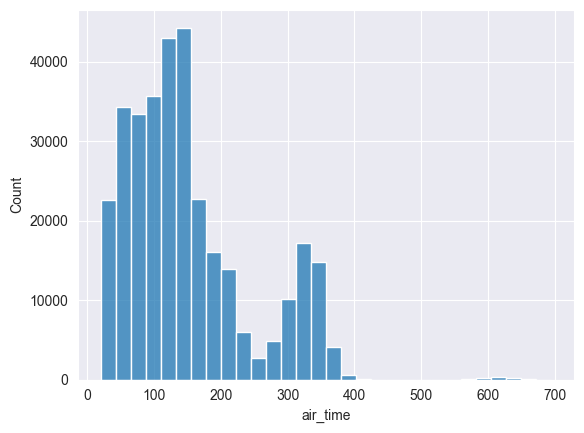

In [32]:
_ = sns.histplot(df_flights, x='air_time', bins=30)

C:\Users\Sebastian\PycharmProjects\data_science\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


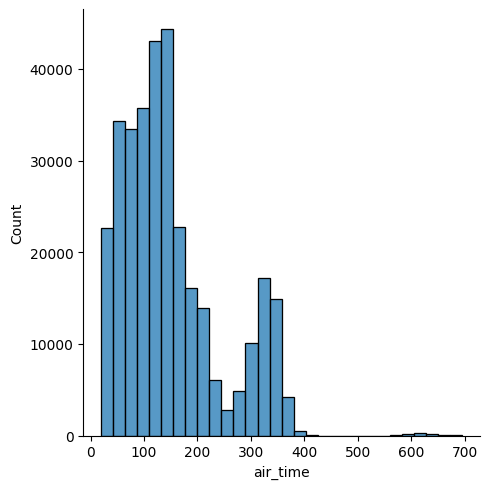

In [37]:
######################################################################################

Histogram - dystans - bins=30

C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


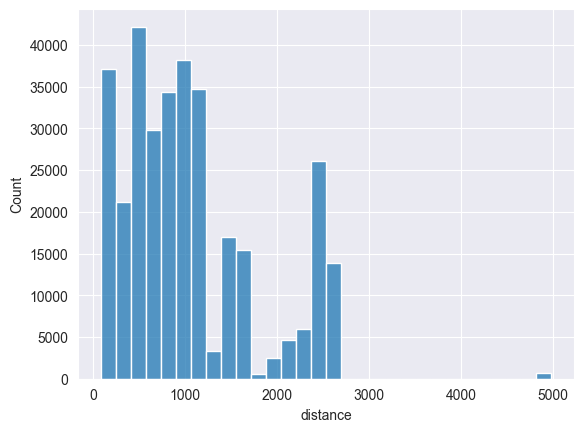

In [33]:
_ = sns.histplot(df_flights, x='distance', bins=30)

C:\Users\Sebastian\PycharmProjects\data_science\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


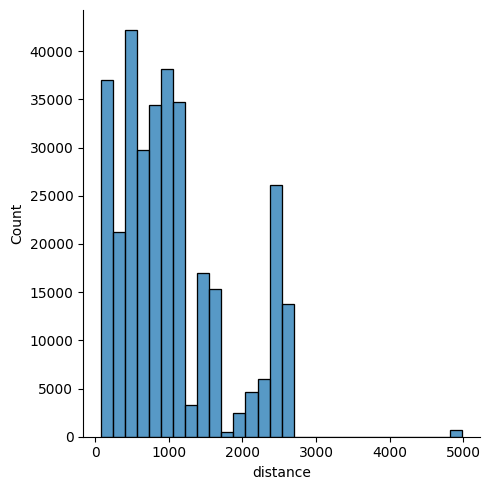

In [38]:
######################################################################################

Wykres relacji - spóźnienie przylotu vs spóźnienie wylotu

C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

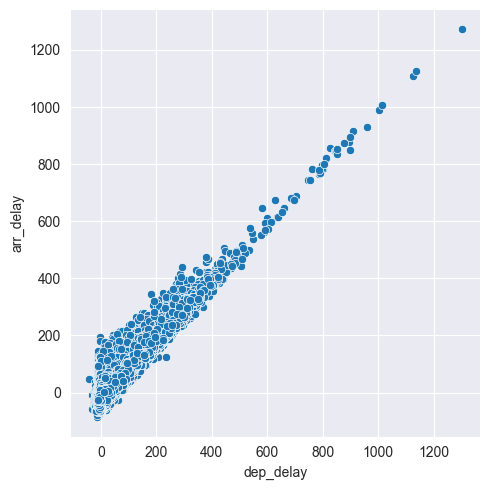

In [34]:
_ = sns.relplot(df_flights, x='dep_delay', y='arr_delay')

C:\Users\Sebastian\PycharmProjects\data_science\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


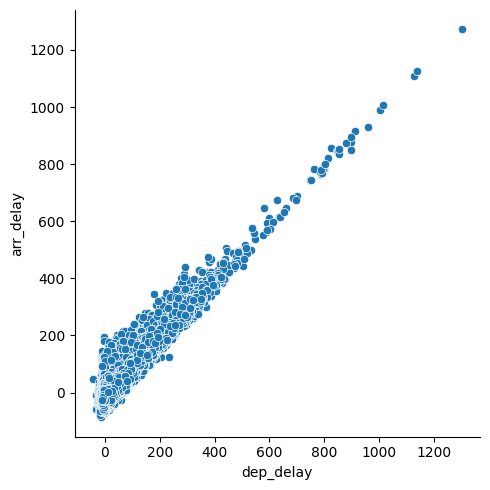

In [40]:
######################################################################################

Wykres relacji - spóźnienie przylotu vs czas wylotu (dep_time)

C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

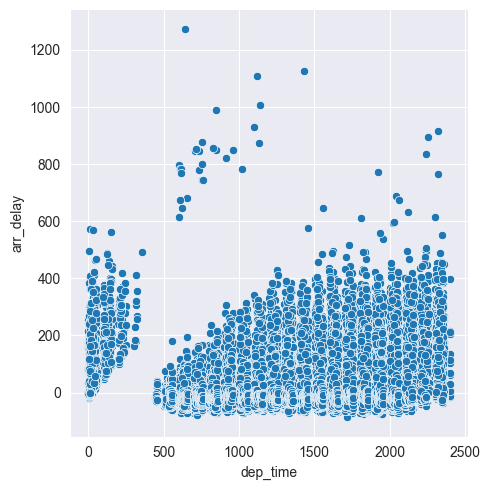

In [35]:
_ = sns.relplot(df_flights, x='dep_time', y='arr_delay')

C:\Users\Sebastian\PycharmProjects\data_science\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


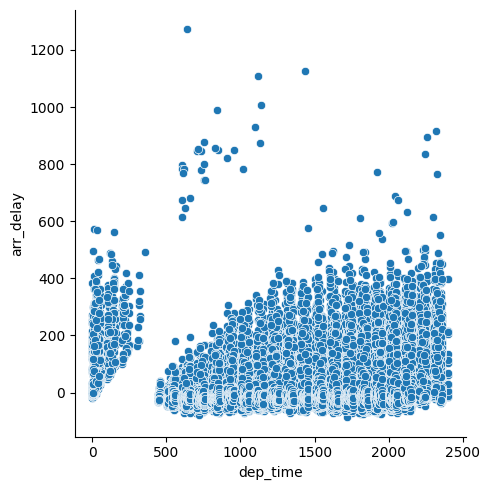

In [41]:
######################################################################################

Wykres relacji - spóźnienie przylotu vs czas przylotu (arr_time)


C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

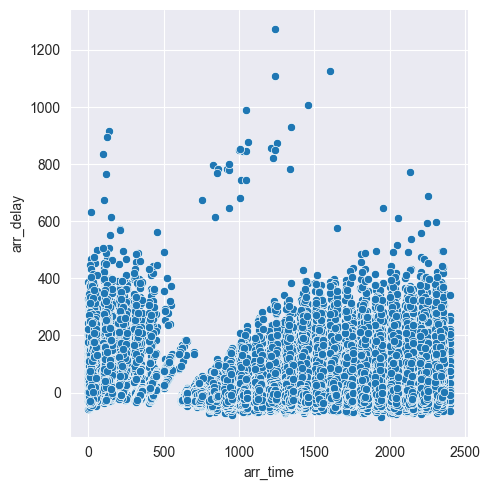

In [36]:
_ = sns.relplot(df_flights, x='arr_time', y='arr_delay')

C:\Users\Sebastian\PycharmProjects\data_science\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


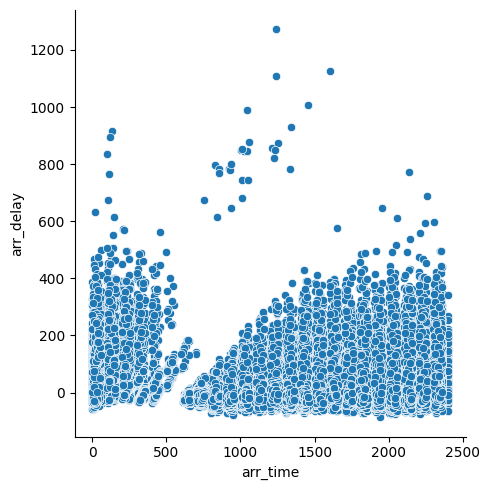

In [42]:
######################################################################################

Wykres relacji kategorii (box) - spóźnienie przylotu vs kod przewoźnika

C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

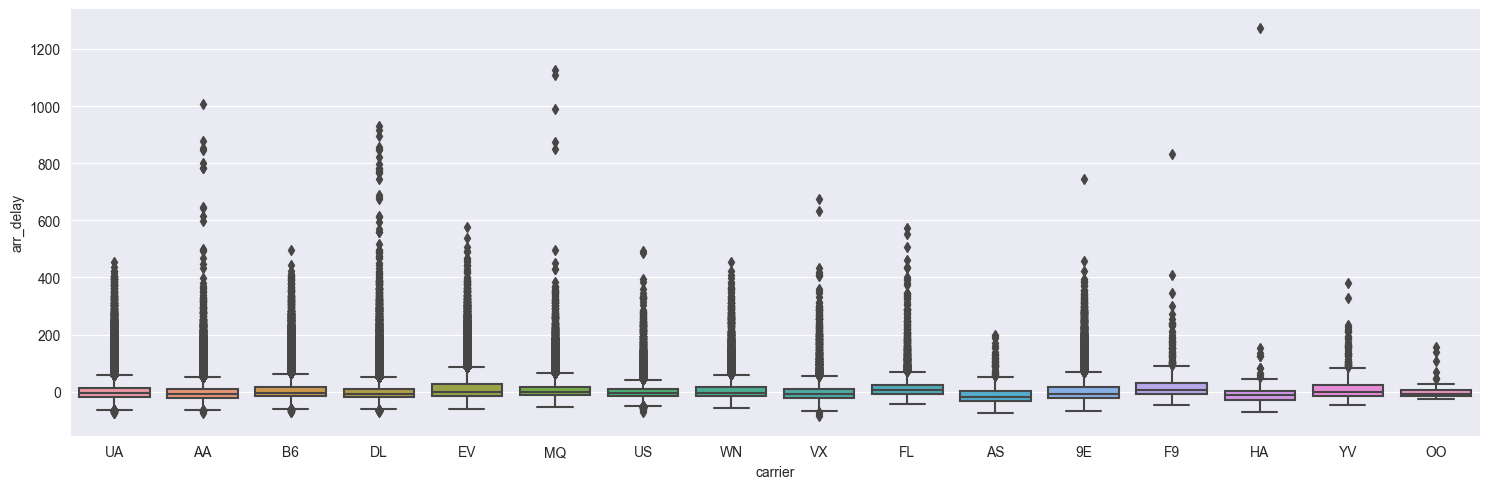

In [41]:
_ = sns.catplot(df_flights, x='carrier', y='arr_delay', kind='box', height=5, aspect=3)

C:\Users\Sebastian\PycharmProjects\data_science\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


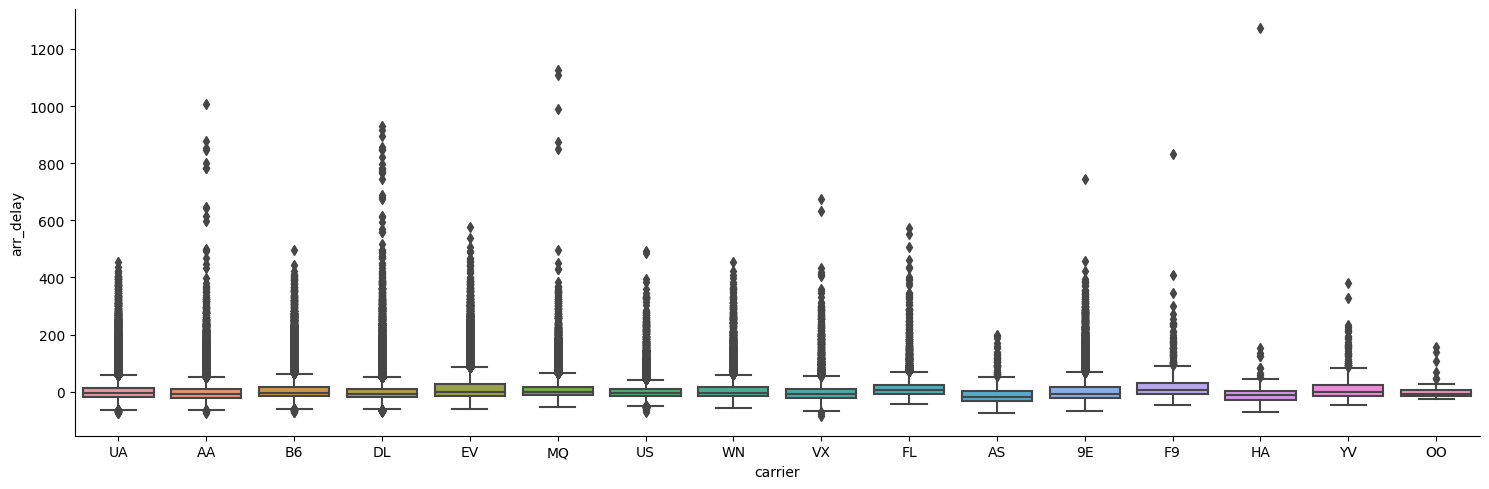

In [44]:
######################################################################################